In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
X = df.drop('species', axis=1)

X.shape

(150, 4)

**KMeans Clustering**

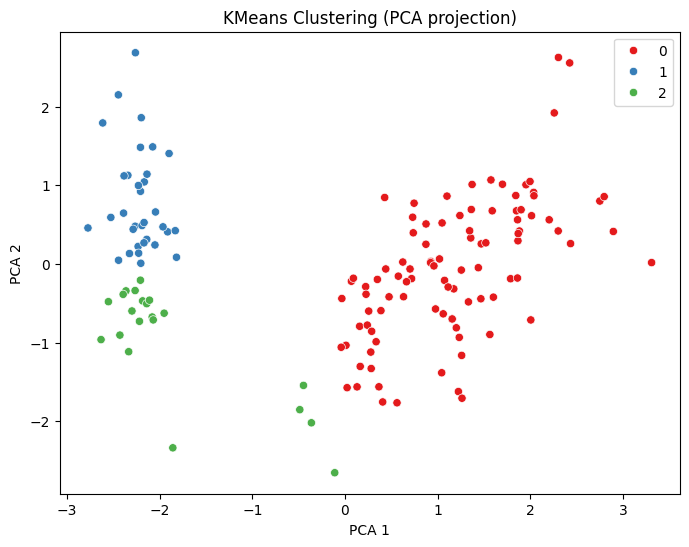

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['KMeans_Cluster'] = kmeans_labels

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set1')
plt.title('KMeans Clustering (PCA projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

**KMeans Clustering** partitions data into K cluters, where each data points belongs to clusters with the nearest means.

It works by

1. Randomly initializing cluster centroids

2. Assigning each data point to the nearest centrod

3. Recomputing centroids as the mean of al assigned pointes

4. Repeating steps 2-3 until convergence

Why suitable for the tris dataset

The iris dataset has continuous numeric features Depal and petal measurements which makes distance-based dartering effective.

It is known to natural form 3 groups Setos Verikio Virginica, aligning with the assumptions of KMeans.

**Hierarchical Clustering**

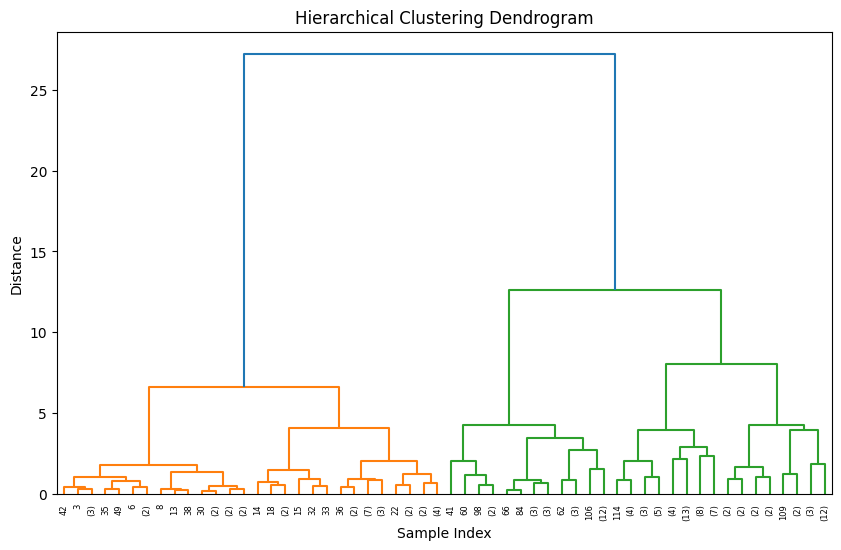

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Hierarchical clustering builds a hierarchy (tree) of clusters.

There are two main approaches:

Agglomerative (bottom-up): Start with each point as its own cluster, then merge the closest clusters.

Divisive (top-down): Start with all points in one cluster and split recursively.

Why suitable for the Iris dataset

Hierarchical clustering does not require pre-specifying the number of clusters (the dendrogram can help decide).

It provides a clear visualization of relationships between species.